In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from cell import Cell
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import copy

## first simulation growth without any abx as an integrity check

In [4]:
time_step = 0.1
param1 = {"ribo_min": 0.5, 
         "p_in": 1, 
         "p_out": 1, 
         "k_on": 1, 
         "k_off": 1, 
         "alpha": 0.05, # ribosome synthesis rate
         "beta": 0.05, # translation rate
         "gama": 0.01, # cell wall synthesis rate
         "abx_env": 0, 
         "t_start": 10000, 
         "t_end": -1}
my_sim1 = Cell(**param1)
initial_conditions = [0, 1, 0, 0, 1] # internal antibiotics, unbound ribosomes, bound ribosomes, precursors, cell volume
length = 300
t_eval = np.arange(0, length, time_step)
time_series1 = my_sim1.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

100%|█████████▉| 999/1000 [00:03<00:00, 273.15‰/s]


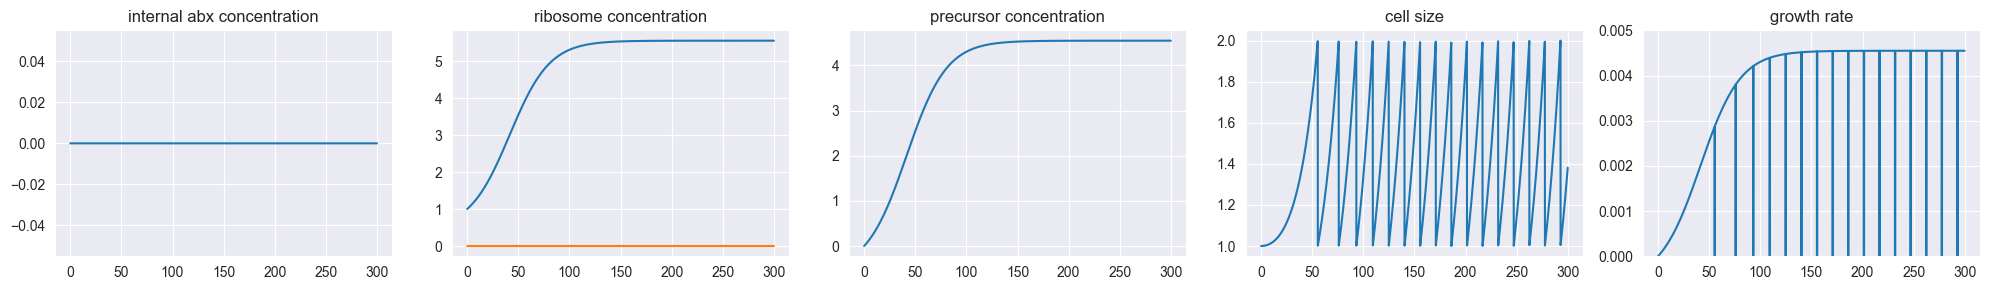

In [31]:
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series1.t, time_series1.y[0])
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series1.t, time_series1.y[1])
axes[1].plot(time_series1.t, time_series1.y[2])
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series1.t, time_series1.y[3])
axes[2].set_title("precursor concentration")
axes[3].plot(time_series1.t, time_series1.y[4])
axes[3].set_title("cell size")
axes[4].plot(time_series1.t, np.gradient(np.log(time_series1.y[4])))
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
fig.tight_layout()
plt.show()

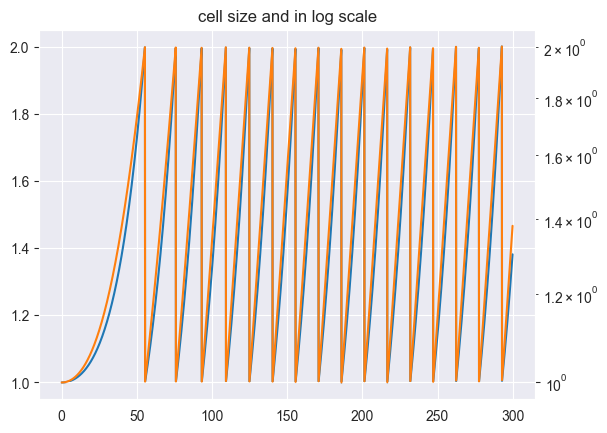

In [6]:
fig0, ax = plt.subplots()
ax.plot(time_series1.t, time_series1.y[4])
ax_twin = ax.twinx()
ax_twin.plot(time_series1.t, time_series1.y[4], color="C1")
ax_twin.set_yscale('log')
ax.set(title="cell size and in log scale")
plt.show()

In [7]:
# cell_size1 = my_sim1.set_adder_trace(adder_constant=2)
# fig2, ax = plt.subplots(2)
# ax[0].plot(time_series1.t, cell_size1)
# # ax_twin = ax.twinx()
# # ax_twin.plot(time_series.t, cell_size, color="C1")
# # ax_twin.set_yscale('log')
# ax[1].plot(time_series1.t, cell_size1, color="C1")
# ax[1].set_yscale('log')
# ax[0].set(title="cell size")
# plt.show()

## try a treatment + recovery

In [34]:
admin_time = 150
recovery_time = 250
param2 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 1, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim2 = Cell(**param2)
length = 500
t_eval = np.arange(0, length, time_step)
time_series2 = my_sim2.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

 32%|███▏      | 321/1000 [00:01<00:03, 174.51‰/s]

Cell size at treatment start: 1.1642522820441452


100%|██████████| 1000/1000 [00:06<00:00, 163.02‰/s]


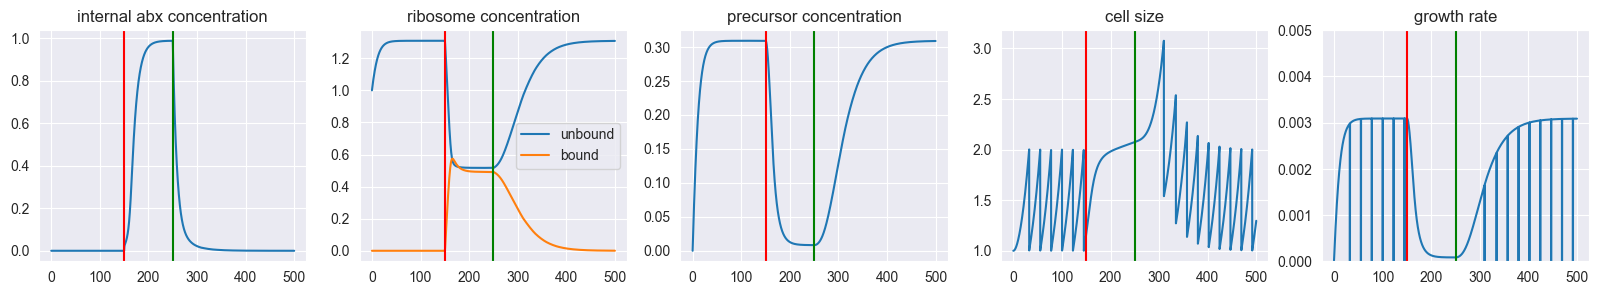

In [35]:
fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series2.t, time_series2.y[0])
axes[0].axvline(admin_time, c='r')
axes[0].axvline(recovery_time, c='g')
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series2.t, time_series2.y[1], label="unbound")
axes[1].plot(time_series2.t, time_series2.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].axvline(recovery_time, c='g')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series2.t, time_series2.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].axvline(recovery_time, c='g')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series2.t, time_series2.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].axvline(recovery_time, c='g')
axes[3].set_title("cell size")
axes[4].plot(time_series2.t, np.gradient(np.log(time_series2.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].axvline(recovery_time, c='g')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()

In [13]:
# cell_size2 = my_sim2.set_adder_trace(adder_constant=2)
# fig2, ax = plt.subplots(2)
# ax[0].plot(time_series2.t, cell_size2)
# # ax_twin = ax.twinx()
# # ax_twin.plot(time_series.t, cell_size, color="C1")
# # ax_twin.set_yscale('log')
# ax[1].plot(time_series2.t, cell_size2, color="C1")
# ax[1].set_yscale('log')
# ax[0].set(title="cell size")
# plt.show()

## Change parameters upon treatment

 35%|███▌      | 351/1000 [00:02<00:03, 174.77‰/s]

Cell size at treatment start: 1.585909160059532


100%|██████████| 1000/1000 [00:06<00:00, 164.88‰/s]


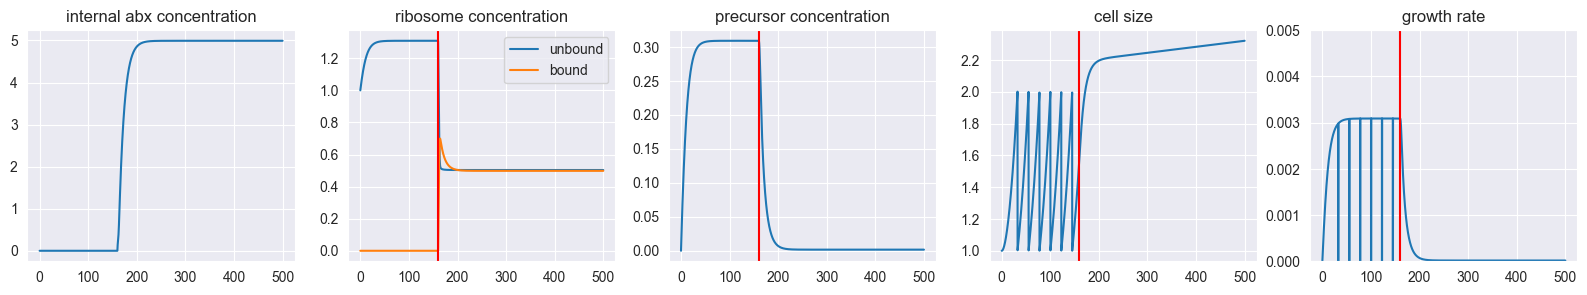

In [36]:
admin_time = 160
recovery_time = -1
param3 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim3 = Cell(**param3)
length = 500
t_eval = np.arange(0, length, time_step)
time_series3 = my_sim3.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series3.t, time_series3.y[0])
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series3.t, time_series3.y[1], label="unbound")
axes[1].plot(time_series3.t, time_series3.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series3.t, time_series3.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series3.t, time_series3.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].set_title("cell size")
axes[4].plot(time_series3.t, np.gradient(np.log(time_series3.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()

 37%|███▋      | 366/1000 [00:02<00:03, 172.89‰/s]

Cell size at treatment start: 1.0798435979747134


100%|██████████| 1000/1000 [00:06<00:00, 166.16‰/s]


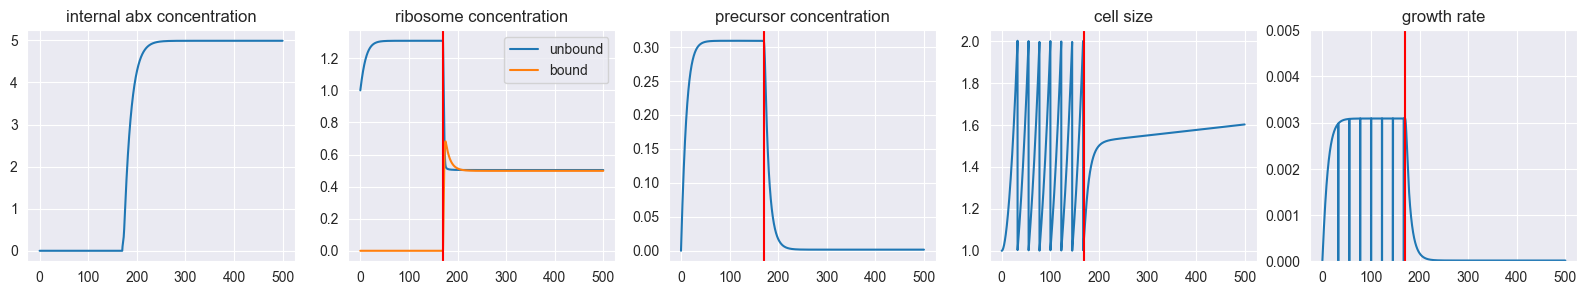

In [37]:
# drug comes in late
admin_time = 170
recovery_time = -1
param4 = {"ribo_min": 0.5, 
          "p_in": 0.01, 
          "p_out": 0.01, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim4 = Cell(**param4)
length = 500
t_eval = np.arange(0, length, time_step)
time_series4 = my_sim4.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series4.t, time_series4.y[0])
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series4.t, time_series4.y[1], label="unbound")
axes[1].plot(time_series4.t, time_series4.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series4.t, time_series4.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series4.t, time_series4.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].set_title("cell size")
axes[4].plot(time_series4.t, np.gradient(np.log(time_series4.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show()

 37%|███▋      | 367/1000 [00:02<00:04, 156.57‰/s]

Cell size at treatment start: 1.0798435979747134


100%|██████████| 1000/1000 [00:06<00:00, 163.61‰/s]


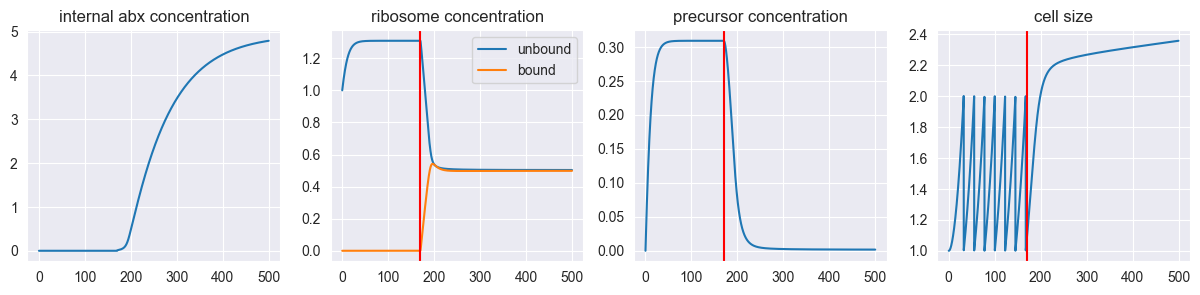

In [16]:
# smaller permeability
admin_time = 170
recovery_time = -1
param5 = {"ribo_min": 0.5, 
          "p_in": 0.001, 
          "p_out": 0.001, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim5 = Cell(**param5)
length = 500
t_eval = np.arange(0, length, time_step)
time_series5 = my_sim5.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
axes[0].plot(time_series5.t, time_series5.y[0])
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series5.t, time_series5.y[1], label="unbound")
axes[1].plot(time_series5.t, time_series5.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series5.t, time_series5.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series5.t, time_series5.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].set_title("cell size")
plt.show() 

 34%|███▎      | 336/1000 [00:02<00:04, 148.89‰/s]

Cell size at treatment start: 1.585909160059532


100%|██████████| 1000/1000 [00:06<00:00, 159.35‰/s]


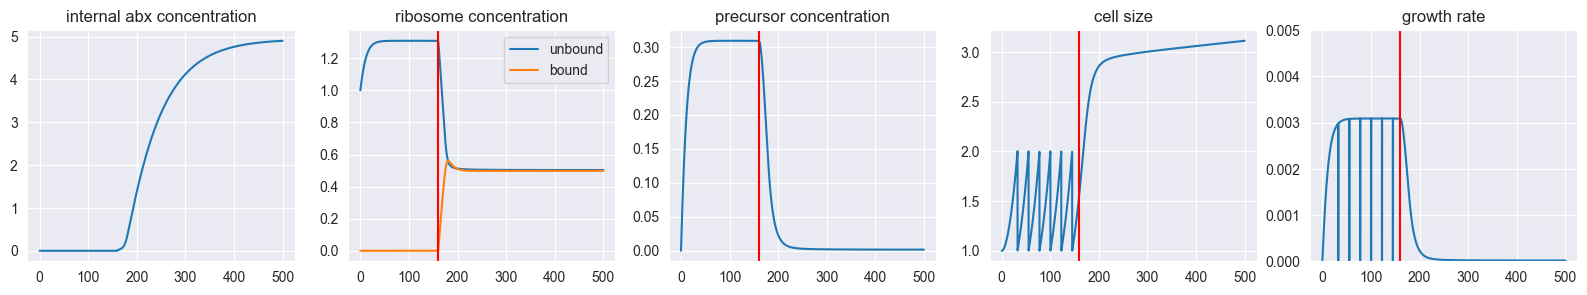

In [27]:
# smaller permeability but larger cell
admin_time = 160
recovery_time = -1
param5 = {"ribo_min": 0.5, 
          "p_in": 0.001, 
          "p_out": 0.001, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim5 = Cell(**param5)
length = 500
t_eval = np.arange(0, length, time_step)
time_series5_2 = my_sim5.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series5_2.t, time_series5_2.y[0])
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series5_2.t, time_series5_2.y[1], label="unbound")
axes[1].plot(time_series5_2.t, time_series5_2.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series5_2.t, time_series5_2.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series5_2.t, time_series5_2.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].set_title("cell size")
axes[4].plot(time_series5_2.t, np.gradient(np.log(time_series5_2.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show() 

 35%|███▌      | 352/1000 [00:02<00:03, 173.67‰/s]

Cell size at treatment start: 1.585909160059532


100%|██████████| 1000/1000 [00:06<00:00, 166.24‰/s]


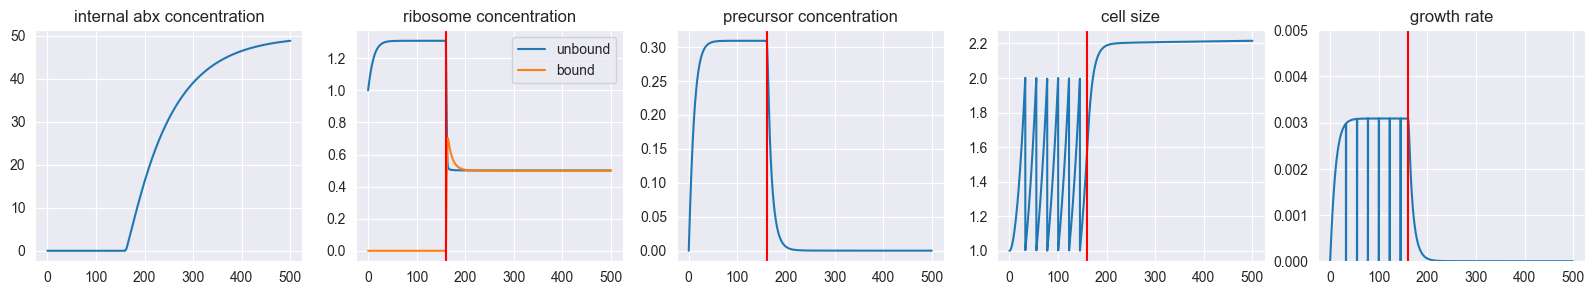

In [29]:
# smaller permeability, larger cell, and higher abx 
admin_time = 160
recovery_time = -1
param5 = {"ribo_min": 0.5, 
          "p_in": 0.001, 
          "p_out": 0.001, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 50, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim5 = Cell(**param5)
length = 500
t_eval = np.arange(0, length, time_step)
time_series5_3 = my_sim5.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series5_3.t, time_series5_3.y[0])
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series5_3.t, time_series5_3.y[1], label="unbound")
axes[1].plot(time_series5_3.t, time_series5_3.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series5_3.t, time_series5_3.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series5_3.t, time_series5_3.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].set_title("cell size")
axes[4].plot(time_series5_3.t, np.gradient(np.log(time_series5_3.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show() 

 36%|███▋      | 363/1000 [00:02<00:03, 170.86‰/s]

Cell size at treatment start: 1.0798435979747134


100%|██████████| 1000/1000 [00:06<00:00, 158.76‰/s]


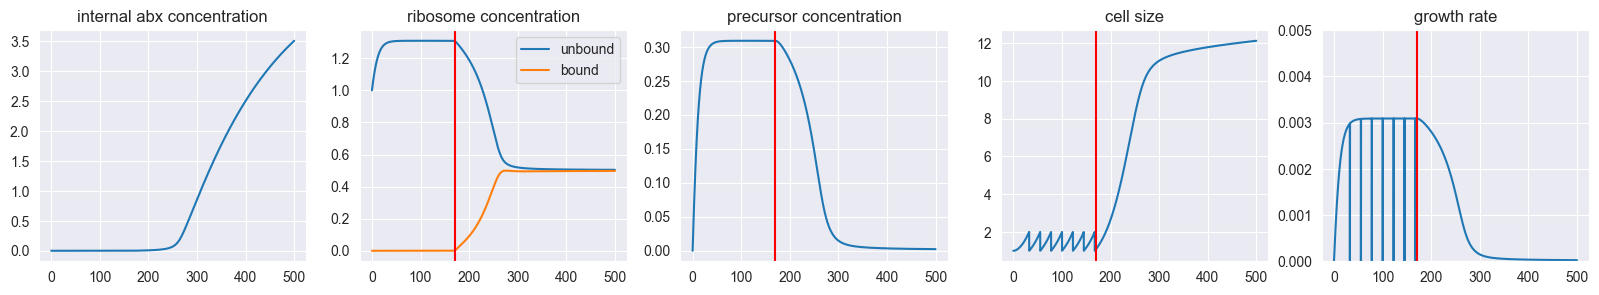

In [30]:
# even smaller permeability
admin_time = 170
recovery_time = -1
param6 = {"ribo_min": 0.5, 
          "p_in": 0.0001, 
          "p_out": 0.0001, 
          "k_on": 3, 
          "k_off": 0.1, 
          "alpha": 0.05, # ribosome synthesis rate
          "beta": 0.05, # translation rate
          "gama": 0.1, # cell wall synthesis rate
          "abx_env": 5, 
          "t_start": admin_time, 
          "t_end": recovery_time}
my_sim6 = Cell(**param6)
length = 500
t_eval = np.arange(0, length, time_step)
time_series6 = my_sim6.cell_growth(initial_conditions, length=length, methods="RK45", t_eval=t_eval)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))
axes[0].plot(time_series6.t, time_series6.y[0])
axes[0].set_title("internal abx concentration")
axes[1].plot(time_series6.t, time_series6.y[1], label="unbound")
axes[1].plot(time_series6.t, time_series6.y[2], label="bound")
axes[1].axvline(admin_time, c='r')
axes[1].legend()
axes[1].set_title("ribosome concentration")
axes[2].plot(time_series6.t, time_series6.y[3])
axes[2].axvline(admin_time, c='r')
axes[2].set_title("precursor concentration")
axes[3].plot(time_series6.t, time_series6.y[4])
axes[3].axvline(admin_time, c='r')
axes[3].set_title("cell size")
axes[4].plot(time_series6.t, np.gradient(np.log(time_series6.y[4])))
axes[4].axvline(admin_time, c='r')
axes[4].set_ylim(0., 0.005)
axes[4].set_title("growth rate")
plt.show() 